# Data Loading

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
dataset_path = 'pulsar_data_train.csv'

In [ ]:
data = pd.read_csv(dataset_path)
data

Mean of the integrated profile  \
0                           121.156250   
1                            76.968750   
2                           130.585938   
3                           156.398438   
4                            84.804688   
...                                ...   
12523                       124.312500   
12524                       115.617188   
12525                       116.031250   
12526                       135.664062   
12527                       120.726562   

        Standard deviation of the integrated profile  \
0                                          48.372971   
1                                          36.175557   
2                                          53.229534   
3                                          48.865942   
4                                          36.117659   
...                                              ...   
12523                                      53.179053   
12524                                      46.784600   
12525                                      43.213846   
12526                                      49.933749   
12527                                      50.472256   

        Excess kurtosis of the integrated profile  \
0                                        0.375485   
1                                        0.712898   
2                                        0.133408   
3                                       -0.215989   
4                                        0.825013   
...                                           ...   
12523                                   -0.012418   
12524                                    0.218177   
12525                                    0.663456   
12526                                   -0.089940   
12527                                    0.346178   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                                -0.013165                   3.168896   
1                                 3.388719                   2.399666   
2                                -0.297242                   2.743311   
3                                -0.171294                  17.471572   
4                                 3.274125                   2.790134   
...                                    ...                        ...   
12523                            -0.556021                   7.186455   
12524                             0.226757                   6.140468   
12525                             0.433088                   0.785117   
12526                            -0.226726                   3.859532   
12527                             0.184797                   0.769231   

        Standard deviation of the DM-SNR curve  \
0                                    18.399367   
1                                    17.570997   
2                                    22.362553   
3                                          NaN   
4                                    20.618009   
...                                        ...   
12523                                29.308266   
12524                                      NaN   
12525                                11.628149   
12526                                21.501505   
12527                                11.792603   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                                  7.449874                      65.159298   
1                                  9.414652                     102.722975   
2                                  8.508364                      74.031324   
3                                  2.958066                       7.197842   
4                                  8.405008                      76.291128   
...                                     ...                            ...   
12523                              4.531382                      21.725143   
12524                              5.732201                      34.357283   
12525        

# Exploratory Data Analysis - Deskripsi Variabel

Mengubah nama kolom menjadi lebih singkat

In [ ]:
data.columns = ['IP_mean', 'IP_std', 'IP_kurtosis', 'IP_skewness','DM-SNR_mean','DM-SNR_std', 'DM-SNR_kurtosis','DM-SNR_skewness', 'target']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP_mean          12528 non-null  float64
 1   IP_std           12528 non-null  float64
 2   IP_kurtosis      10793 non-null  float64
 3   IP_skewness      12528 non-null  float64
 4   DM-SNR_mean      12528 non-null  float64
 5   DM-SNR_std       11350 non-null  float64
 6   DM-SNR_kurtosis  12528 non-null  float64
 7   DM-SNR_skewness  11903 non-null  float64
 8   target           12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [ ]:
data.describe()

IP_mean        IP_std   IP_kurtosis   IP_skewness   DM-SNR_mean  \
count  12528.000000  12528.000000  10793.000000  12528.000000  12528.000000   
mean     111.041841     46.521437      0.478548      1.778431     12.674758   
std       25.672828      6.801077      1.064708      6.208450     29.613230   
min        5.812500     24.772042     -1.738021     -1.791886      0.213211   
25%      100.871094     42.362222      0.024652     -0.188142      1.910535   
50%      115.183594     46.931022      0.223678      0.203317      2.792642   
75%      127.109375     50.979103      0.473125      0.932374      5.413253   
max      189.734375     91.808628      8.069522     68.101622    222.421405   

         DM-SNR_std  DM-SNR_kurtosis  DM-SNR_skewness        target  
count  11350.000000     12528.000000     11903.000000  12528.000000  
mean      26.351318         8.333489       105.525779      0.092034  
std       19.610842         4.535783       107.399585      0.289085  
min        7.370432        -3.139270        -1.976976      0.000000  
25%       14.404353         5.803063        35.199899      0.000000  
50%       18.412402         8.451097        83.126301      0.000000  
75%       28.337418        10.727927       139.997850      0.000000  
max      110.642211        34.539844      1191.000837      1.000000

# Exploratory Data Analysis - Menangani Missing Value dan Outliers

## Menangani Missing Value

Dari data null yang didapatkan dari, dapat disimpulkan bahwa terdapat 3 kolom yang tidak memiliki nilai yaitu IP_kurtosis, DM-SNR_std, dan DM-SNR_skewness.

In [ ]:
data.isnull().sum()

IP_mean               0
IP_std                0
IP_kurtosis        1735
IP_skewness           0
DM-SNR_mean           0
DM-SNR_std         1178
DM-SNR_kurtosis       0
DM-SNR_skewness     625
target                0
dtype: int64

Dan jika dilihat heatmap pada gambar dibawah, terlihat bahwa value yang null tersebar merata atau tidak fokus pada satu tempat.

<Axes: >

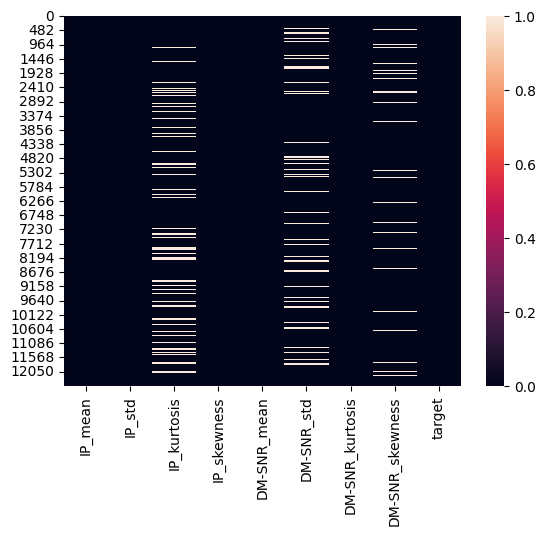

In [ ]:
sns.heatmap(data.isnull())

Maka dari itu, untuk mengisi data yang null, saya memakai method fillna dengan method 'ffill', yang dimana method tersebut mengisi data yang kosong dengan cara mengambil data sebelumnya yang sudah terisi.

In [ ]:
data['IP_kurtosis'].fillna(method = "ffill", inplace = True)
data['DM-SNR_std'].fillna(method = "ffill", inplace = True)
data['DM-SNR_skewness'].fillna(method = "ffill", inplace = True)

In [ ]:
data.isnull().sum()

IP_mean            0
IP_std             0
IP_kurtosis        0
IP_skewness        0
DM-SNR_mean        0
DM-SNR_std         0
DM-SNR_kurtosis    0
DM-SNR_skewness    0
target             0
dtype: int64

<Axes: >

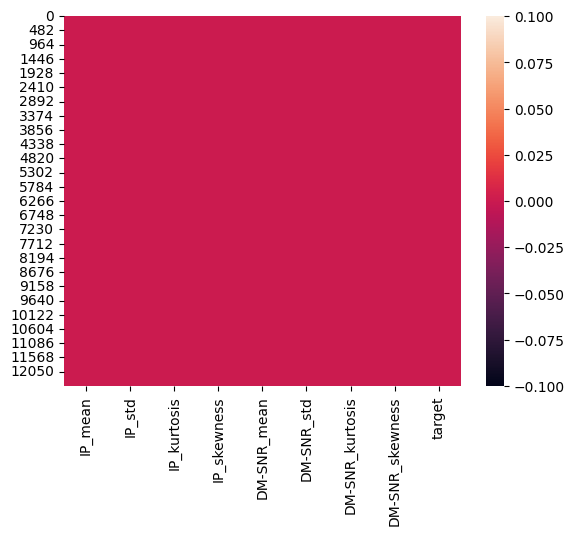

In [ ]:
sns.heatmap(data.isnull())

## Menangani Outliers

Menghitung jumlah outliers

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Total Outliers:')
((data < (lower_range)) | (data > (upper_range))).sum()

Total Outliers:


IP_mean             717
IP_std              178
IP_kurtosis        1124
IP_skewness        1340
DM-SNR_mean        2047
DM-SNR_std         1670
DM-SNR_kurtosis     349
DM-SNR_skewness     650
target             1153
dtype: int64

Menggambarkan data outliers dalam bentuk histogram dan boxplot. Dan dapat dilihat dari boxplot yang berada di sebelah kanan tersebut memiliki banyak outliers. Sementara untuk gambar Histogram, untuk melihat lebih jelas distribusi data.



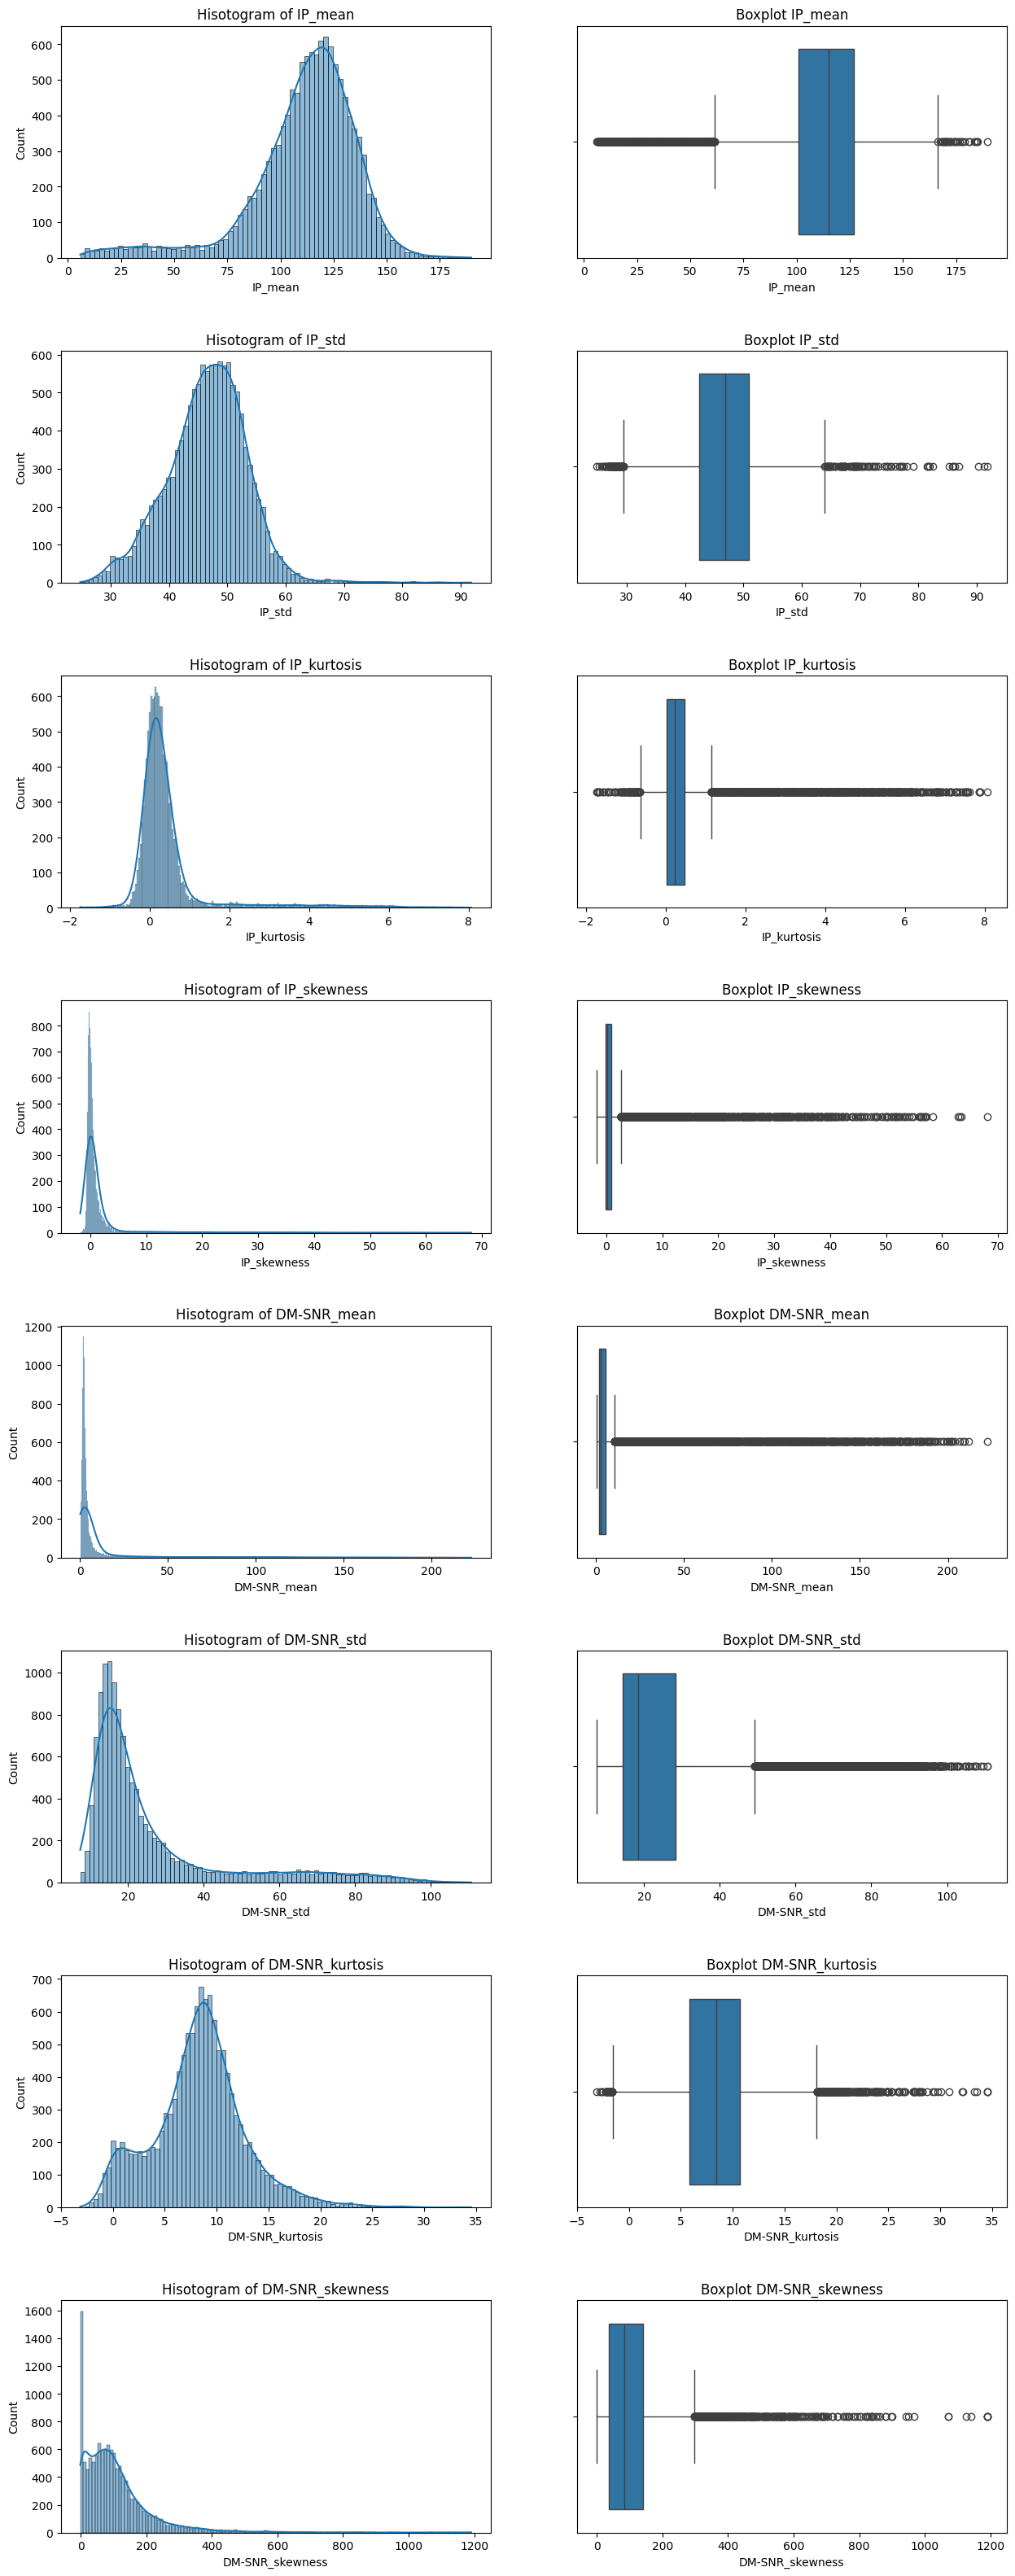

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 40))
fig.subplots_adjust(hspace = .4, wspace=.2)
for i in range(0,len(data.columns)-1):
  sns.histplot(data[data.columns[i]], ax=axes[i][0], kde=True).set_title("Hisotogram of " + data.columns[i],)
  sns.boxplot(x=data[data.columns[i]], ax=axes[i][1]).set_title("Boxplot " + data.columns[i])

Mengatasai outliers dengan menggunakan batas bawah dan batas atas dari data.

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in data.loc[:,:'DM-SNR_skewness'].columns:
    if 1==1:
        lr,ur=remove_outlier(data[column])
        data[column]=np.where(data[column]>ur,ur,data[column])
        data[column]=np.where(data[column]<lr,lr,data[column])

Dan dapat dilihat dari hasil gambar tersebut, dari gambar boxplot dataset sudah tidak memiliki data outliers lagi, tetapi jika dilihat pada gambar histogram, terdapat satu jenis data yang sangat tinggi.

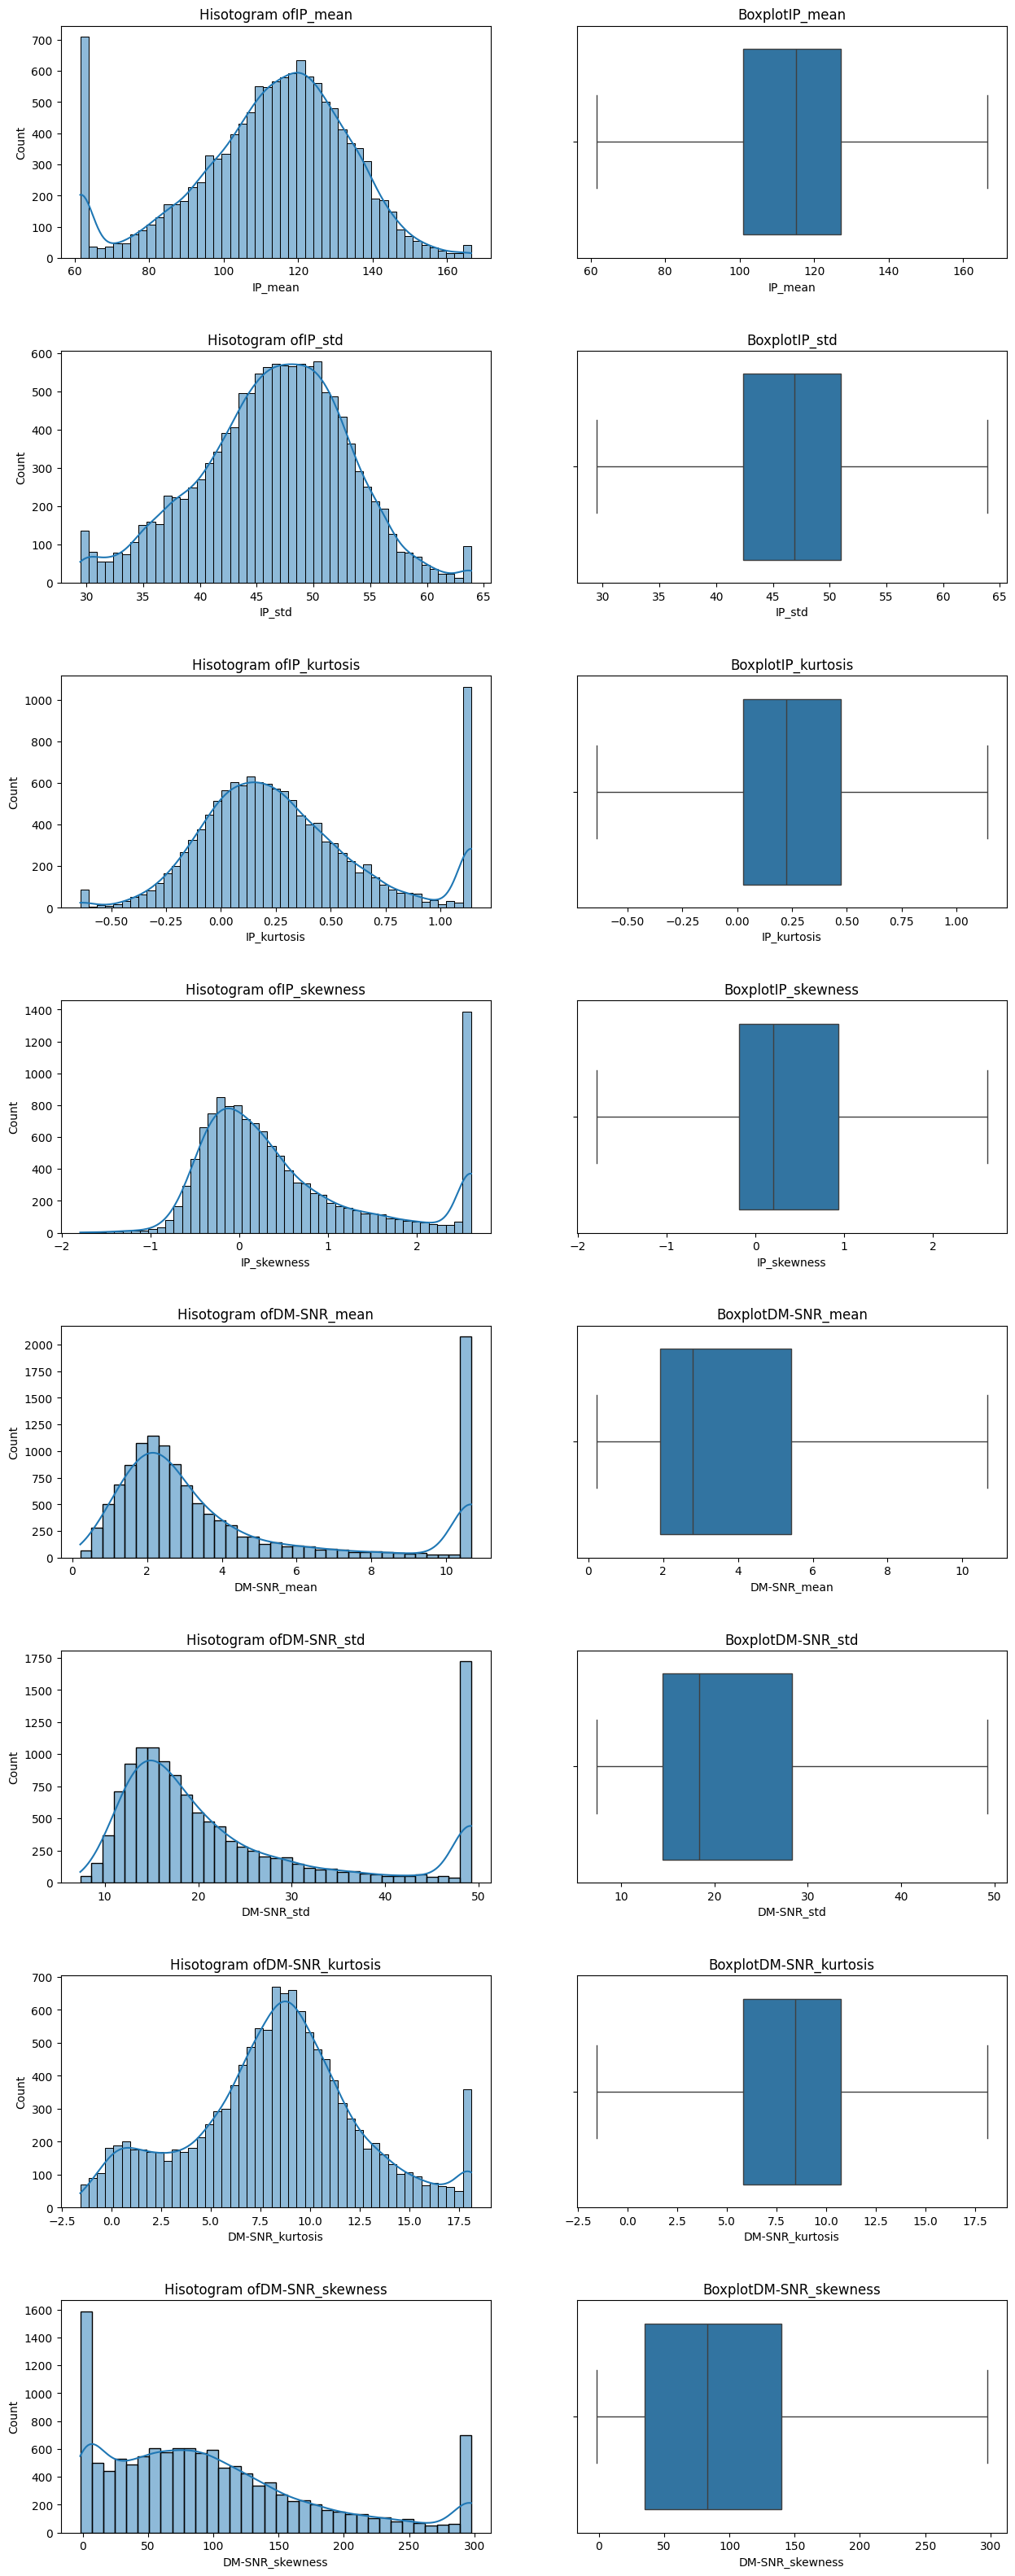

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 40))
fig.subplots_adjust(hspace = .4, wspace=.2)
for i in range(0,len(data.columns)-1):
  sns.histplot(data[data.columns[i]], ax=axes[i][0], kde=True).set_title("Hisotogram of" + data.columns[i],)
  sns.boxplot(x=data[data.columns[i]], ax=axes[i][1]).set_title("Boxplot" + data.columns[i])

# Exploratory Data Analysis - Multivariate Analysis

Mengamati hubungan antar fitur numerik dengan fungsi pairplot, dan dapat dilihat dari gambar tersebut banyak data yang sangat terdistribusi, sehingga kita harus melihat dari sisi correlation matrix.

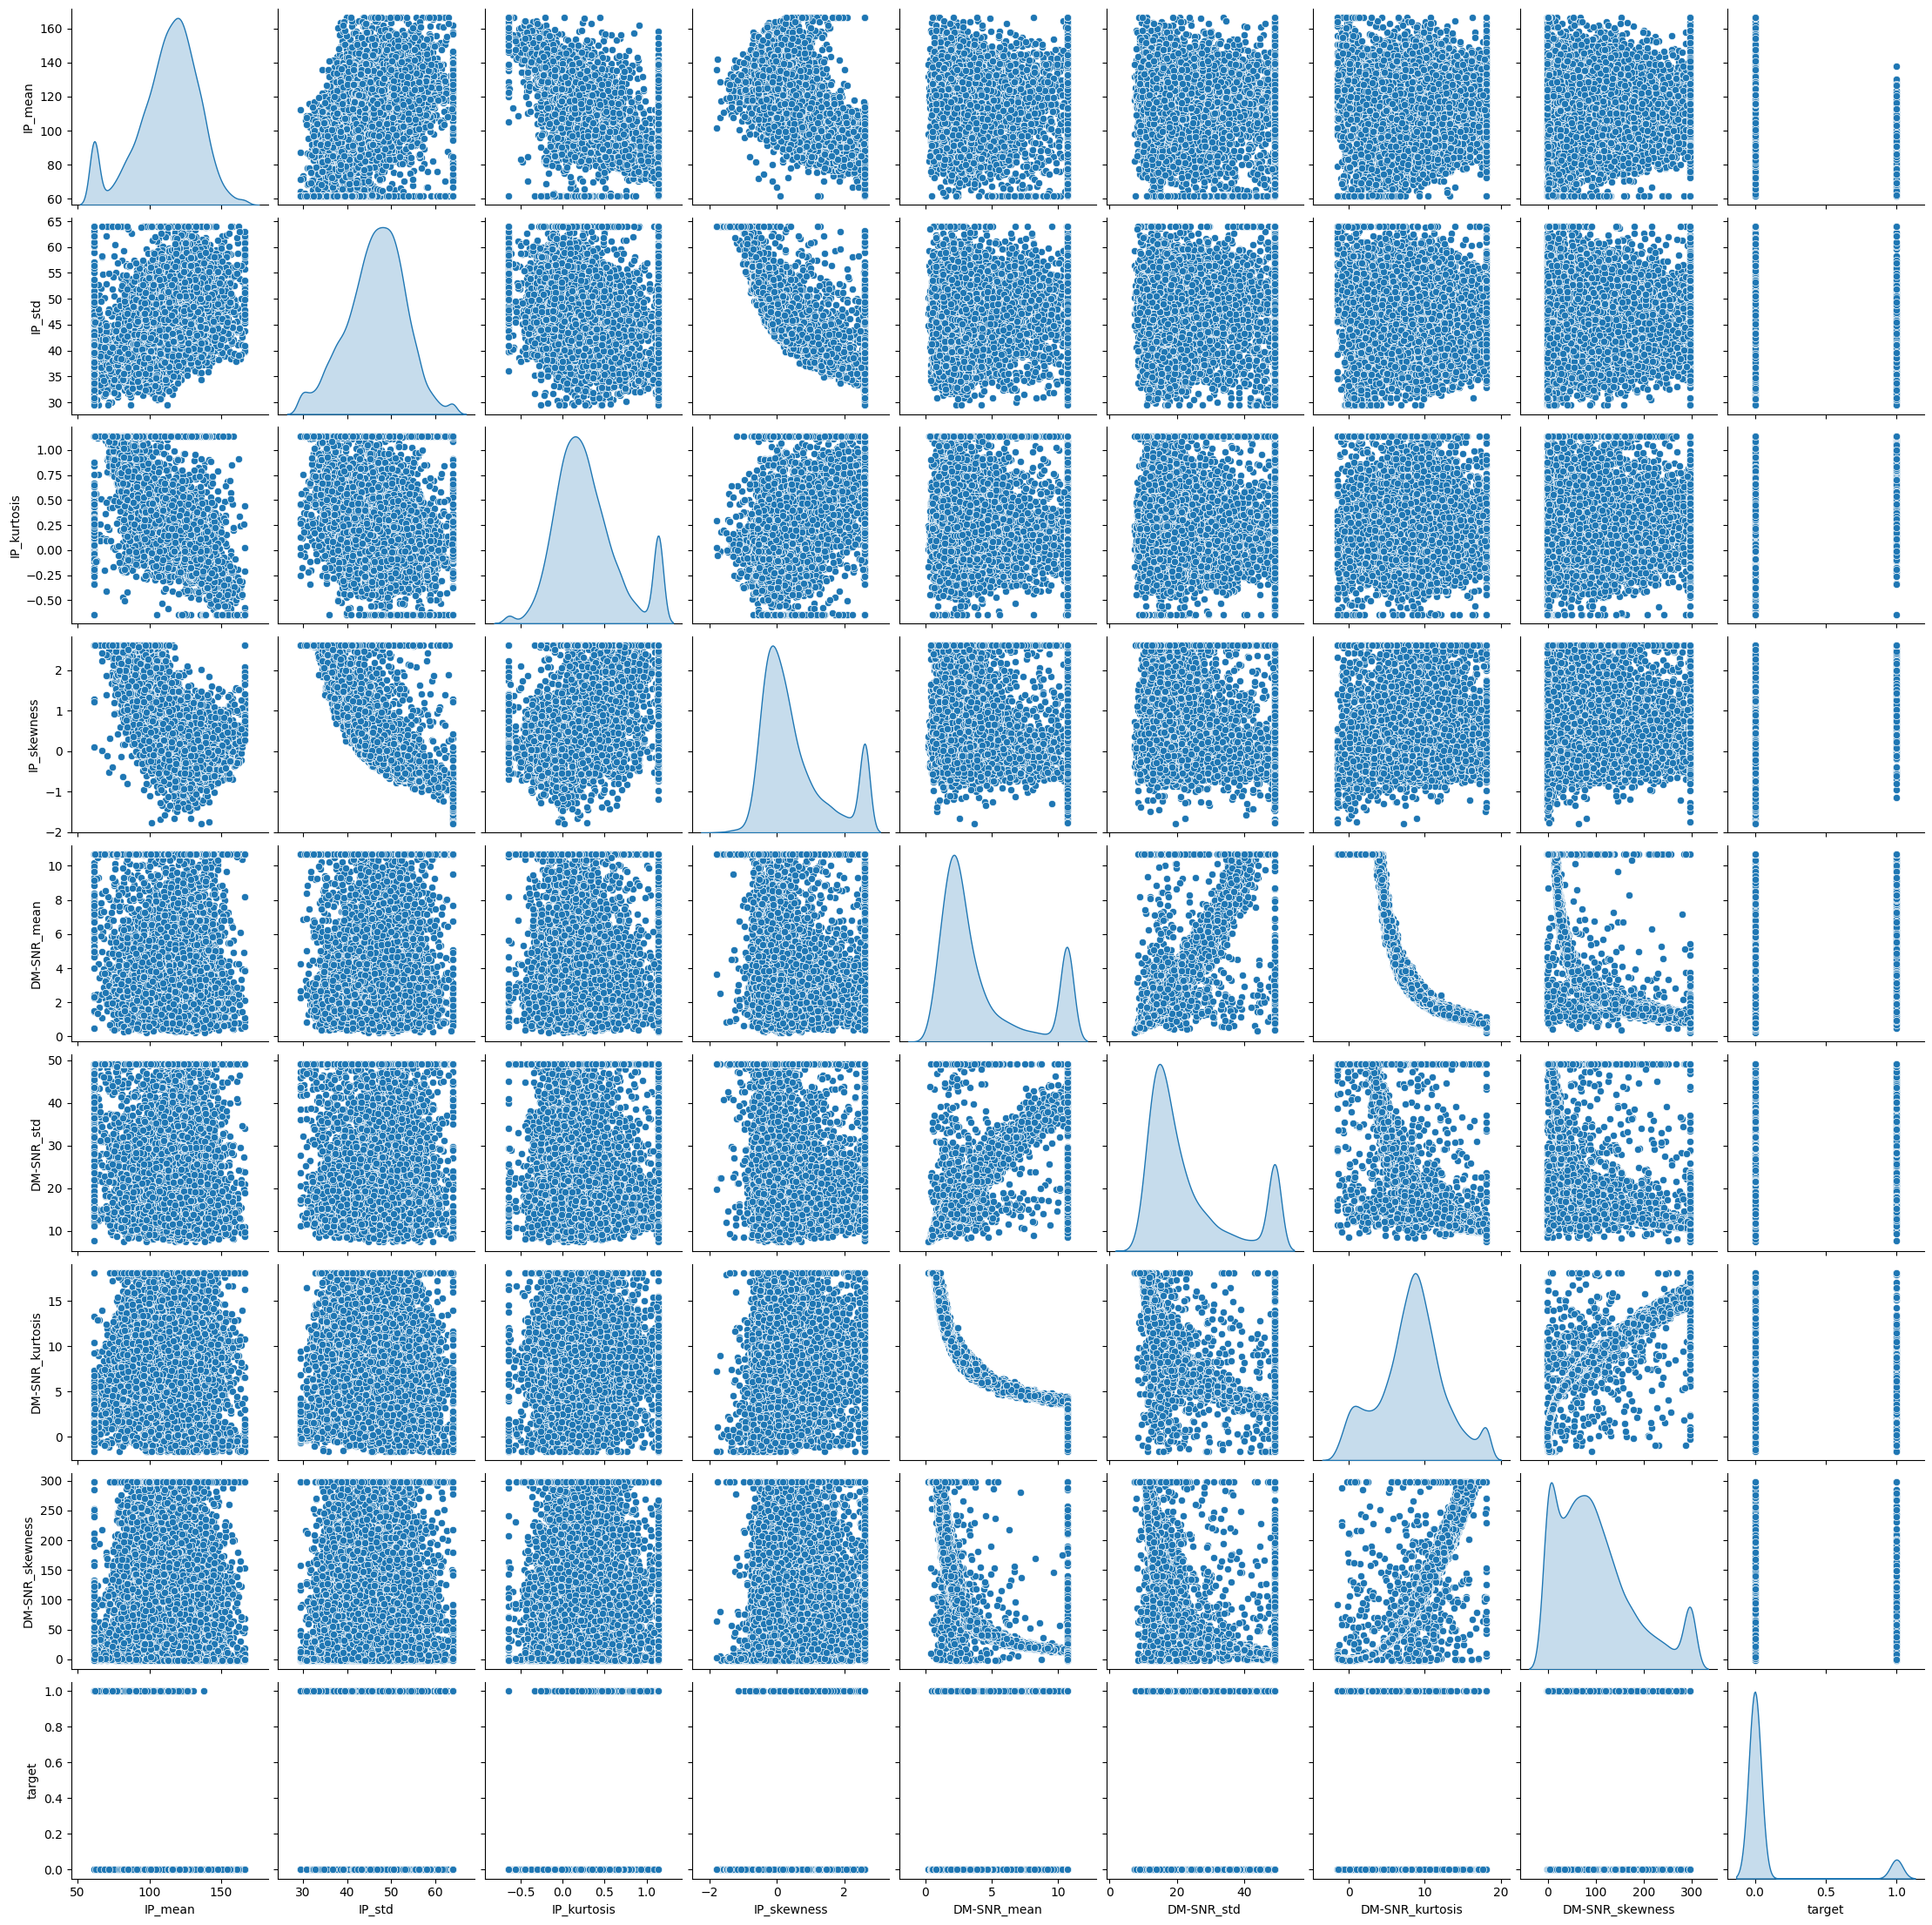

In [ ]:
sns.pairplot(data, diag_kind = 'kde')

Jika dilihat hasil dari correlation matrix pada gambar dibawah, dan jika fokus pada kolom target, setiap kolom yang berhubungan dengan target tidak ada nilainya yang mendekati nol, sehingga tidak perlu adanya penghapusan kolom.


Text(0.5, 1.0, 'Correlation Matrix')

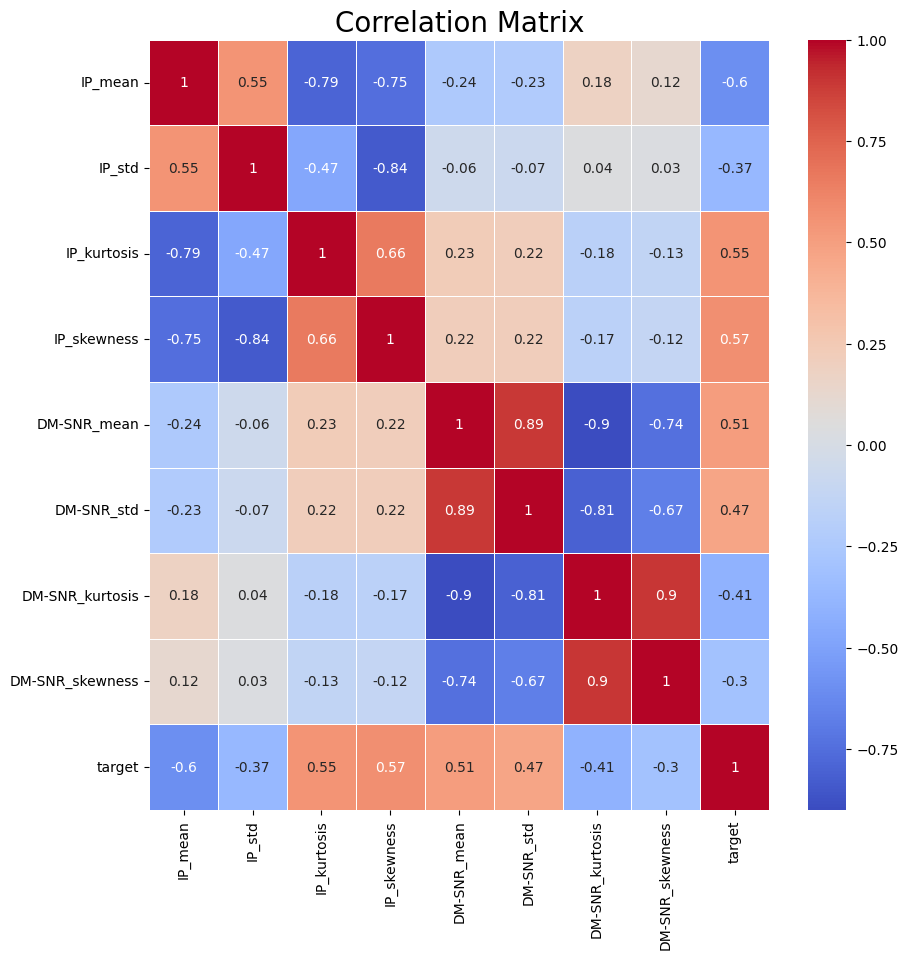

In [ ]:
plt.figure(figsize=(10, 10))
correlation_matrix = data.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

# Data Preparation

## Train-Test-Split

In [ ]:
X = data.drop(["target"],axis =1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Jumlah seluruh dataset: {len(X)}')
print(f'Jumlah train dataset: {len(X_train)}')
print(f'Jumlah test dataset: {len(X_test)}')

Jumlah seluruh dataset: 12528
Jumlah train dataset: 11275
Jumlah test dataset: 1253


## Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)

# Model Development dengan SVM

Untuk metode development yang saya pakai adalah SVM, dikarenakan SVM cocok untuk data supervised learning yang memiliki dimensi tinggi dengan jumlah data yang banyak. Selain itu saya akan membandingkan kernel yang terdapat pada svm yaitu RBF kernel dan linier kernel.

In [ ]:
SVM = svm.SVC(random_state=1).fit(X_trains, y_train)

Sebelum menggunakan SVM, kita harus mencari parameter yang optimal untuk digunakan SVM.

In [ ]:
SVM_param_grid = {'C': [0.01,0.1, 1, 10],
              'gamma': [0.09, 0.1, 0.2, 0.001],
              'kernel': ['rbf'],
              'tol':[0.001,0.0001],
              'degree':[2,3]}

SVM_grid1 = GridSearchCV(SVM, param_grid = SVM_param_grid, cv = 5, n_jobs=-1)

In [ ]:
SVM_grid1.fit(X_trains, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.09, 0.1, 0.2, 0.001], 'kernel': ['rbf'],
                         'tol': [0.001, 0.0001]})

Setelah melakukan fit, kita mendapatkan hasil terbaiknya dengan memanggi method best_estimator

In [ ]:
SVM_grid1.best_estimator_

SVC(C=10, degree=2, gamma=0.1, random_state=1)

## SVM dengan RBF Kernel

Lanjut dengan melakukan training. Dan dapat dilihat hasil klasifikasi metris sertaakurasi, presisi, dan recal yang dihasilkan oleh RBF kernel.

In [ ]:
SVM_grid_rbf = svm.SVC(C=10,degree=2, gamma=0.1, kernel='rbf', random_state=1)
SVM_grid_rbf.fit(X_trains, y_train)

SVC(C=10, degree=2, gamma=0.1, random_state=1)

## SVM dengan Linier Kernel

Setelah mencoba RBF kernel, selanjutnya mencoba menggunakan linier kernel, untuk tahap kali ini tidak memakai GridSearch karena sudah pernah dilakukan sebelumnya, dan untuk menbandingkan siapa yang terbaik, kita harus menyamakan parameter yang digunakan oleh RBF kernel.

In [ ]:
SVM_grid_linier = svm.SVC(C=10,degree=2, gamma=0.1, kernel='linear', random_state=1)
SVM_grid_linier.fit(X_trains, y_train)

SVC(C=10, degree=2, gamma=0.1, kernel='linear', random_state=1)

# Evaluation

## SVM dengan RBF Kernel

In [ ]:
print('Hasil klasifikasi metriks dari training data:\n\n',metrics.classification_report(y_train, SVM_grid_rbf.predict(X_trains)),'\n')
print('Hasil klasifikasi metriks dari test data:\n\n',metrics.classification_report(y_test, SVM_grid_rbf.predict(X_tests)),'\n')

Hasil klasifikasi metriks dari training data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     10242
         1.0       0.94      0.84      0.89      1033

    accuracy                           0.98     11275
   macro avg       0.96      0.92      0.94     11275
weighted avg       0.98      0.98      0.98     11275
 

Hasil klasifikasi metriks dari test data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1133
         1.0       0.91      0.80      0.85       120

    accuracy                           0.97      1253
   macro avg       0.94      0.90      0.92      1253
weighted avg       0.97      0.97      0.97      1253
 



In [ ]:
y_pred_rbf = SVM_grid_rbf.predict(X_tests)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred_rbf),3)*100)+'%')

SVM best accuracy : 97.3%


In [ ]:
print("Precision Score : ",np.round(precision_score(y_test, y_pred_rbf, pos_label='positive',average='micro'),3)*100,'%')
print("Recall Score : ",np.round(recall_score(y_test, y_pred_rbf, pos_label='positive',average='micro'),3)*100,'%')
print("F1-Score : ",np.round(f1_score(y_test, y_pred_rbf, pos_label='positive',average='micro'),3)*100,'%')

Precision Score :  97.3 %
Recall Score :  97.3 %
F1-Score :  97.3 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


## SVM dengan Linier Kernel

In [ ]:
print('Hasil klasifikasi metriks dari training data:\n\n',metrics.classification_report(y_train, SVM_grid_linier.predict(X_trains)),'\n')
print('Hasil klasifikasi metriks dari test data:\n\n',metrics.classification_report(y_test, SVM_grid_linier.predict(X_tests)),'\n')

Hasil klasifikasi metriks dari training data:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     10242
         1.0       0.90      0.81      0.85      1033

    accuracy                           0.97     11275
   macro avg       0.94      0.90      0.92     11275
weighted avg       0.97      0.97      0.97     11275
 

Hasil klasifikasi metriks dari test data:

               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1133
         1.0       0.90      0.76      0.82       120

    accuracy                           0.97      1253
   macro avg       0.94      0.87      0.90      1253
weighted avg       0.97      0.97      0.97      1253
 



In [ ]:
y_pred_linier = SVM_grid_linier.predict(X_tests)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred_linier),4)*100)+'%')

SVM best accuracy : 96.89%


In [ ]:
print("Precision Score : ",np.round(precision_score(y_test, y_pred_linier, pos_label='positive',average='micro'),4)*100,'%')
print("Recall Score : ",np.round(recall_score(y_test, y_pred_linier, pos_label='positive',average='micro'),4)*100,'%')
print("F1-Score : ",np.round(f1_score(y_test, y_pred_linier, pos_label='positive',average='micro'),4)*100,'%')

Precision Score :  96.89 %
Recall Score :  96.89 %
F1-Score :  96.89 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


**Dapat disimpulkan bahwa SVM dengan method yang paling optimal adalah RBF Kernel, walaupun hanya terdapat perbedaan sedikit**